In [1]:
import os
import matplotlib.pyplot as plt

In [7]:
# Read and process data
log_file = open("/home/user/subt_ws/src/lamp/src/lamp_pgo/log/log.txt","r")
lines = log_file.readlines()
stats = []
lines = lines[1:]
for line in lines:
    stat = [float(i) for i in line.split()]
    stats.append(stat)

In [33]:
# Read and process data 2 
error_file = open("/home/user/subt_ws/src/lamp/src/lamp_pgo/log/error.txt","r")
lines = error_file.readlines()
errors = []
lines = lines[1:]
for line in lines: 
    error = [float(i) for i in line.split()]
    errors.append(error)

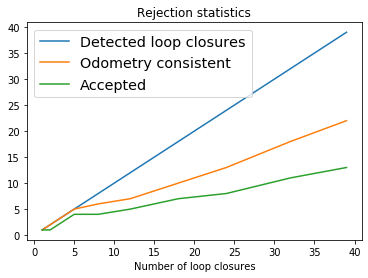

In [41]:
# Plot number of inliers of the number of loop clousres 
num_loop_closures = [stat[0] for stat in stats]
num_odom_consistent = [stat[2] for stat in stats]
num_inliers = [stat[1] for stat in stats]

fig, ax = plt.subplots()
ax.plot(num_loop_closures, num_loop_closures, label='Detected loop closures')
ax.plot(num_loop_closures, num_odom_consistent, label='Odometry consistent')
ax.plot(num_loop_closures, num_inliers, label='Accepted')
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Number of loop closures')
plt.title('Rejection statistics')
plt.show()

Text(0.5, 1.0, 'Pose graph error')

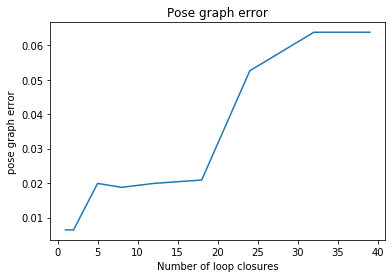

In [42]:
# Plot error over number of loop closures 
num_loop_closures = [stat[0] for stat in stats]
error = [stat[-1] for stat in stats]

plt.plot(num_loop_closures, error)
plt.xlabel('Number of loop closures')
plt.ylabel('pose graph error')
plt.title('Pose graph error')

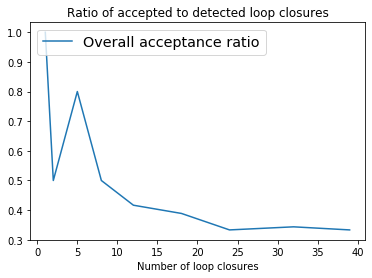

In [43]:
# Plot ratio of accepted loop closures 
num_loop_closures = [stat[0] for stat in stats]
overall_ratio = [stat[1]/stat[0] for stat in stats]
multirobot_ratio = [stat[4]/stat[3] for stat in stats if stat[3] != 0]
singlerobot_ratio = [(stat[1] - stat[4])/(stat[0] - stat[3])]

fig, ax = plt.subplots()
ax.plot(num_loop_closures, overall_ratio, label='Overall acceptance ratio')
if (len(multirobot_ratio) > 0):
    ax.plot(num_loop_closures, multirobot_ratio, label='Multirobot acceptance ratio')
    ax.plot(num_loop_closures, singlerobot_ratio, label='Single robot acceptance ratio')
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Number of loop closures')
plt.title('Ratio of accepted to detected loop closures')
plt.show()

Text(0.5, 1.0, 'Consistency error by number of loop closures')

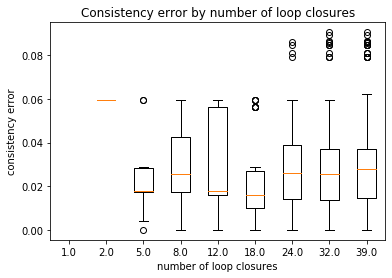

In [44]:
# Plot consistecy error of loop closures 
num_loop_closures = [stat[0] for stat in stats]

fig, ax = plt.subplots()
ax.boxplot(errors)
ax.set_xticklabels(num_loop_closures)
plt.xlabel('number of loop closures')
plt.ylabel('consistency error')
plt.title('Consistency error by number of loop closures')